<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sandford+-2020,-Section-6:-Discussion" data-toc-modified-id="Sandford+-2020,-Section-6:-Discussion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sandford+ 2020, Section 6: Discussion</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Plotting-Configs" data-toc-modified-id="Plotting-Configs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotting Configs</a></span></li><li><span><a href="#Figures-16:-CRLBs-vs.-2000-\AA-Window-(R=2000)" data-toc-modified-id="Figures-16:-CRLBs-vs.-2000-\AA-Window-(R=2000)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Figures 16: CRLBs vs. 2000 \AA Window (R=2000)</a></span></li><li><span><a href="#Figures-17:-CRLBs-vs.-2000-\AA-Window-(R=5000)" data-toc-modified-id="Figures-17:-CRLBs-vs.-2000-\AA-Window-(R=5000)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Figures 17: CRLBs vs. 2000 \AA Window (R=5000)</a></span></li><li><span><a href="#Figure-18:-Gradients-of-r-/s-process-Elements" data-toc-modified-id="Figure-18:-Gradients-of-r-/s-process-Elements-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Figure 18: Gradients of r-/s-process Elements</a></span></li><li><span><a href="#Figure-19:-CRLBs-Beyond-1-Mpc" data-toc-modified-id="Figure-19:-CRLBs-Beyond-1-Mpc-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Figure 19: CRLBs Beyond 1 Mpc</a></span></li></ul></li></ul></div>

# Sandford+ 2020, Section 6: Discussion
## Imports 

In [1]:
import sys
sys.path.append('/Users/nathansandford/PycharmProjects/Chem-I-Calc/')
sys.path.reverse()

In [2]:
import numpy as np
import pandas as pd
from astropy.io import fits

from chemicalc import instruments as inst
from chemicalc import reference_spectra as ref
from chemicalc.utils import calc_crlb, sort_crlb, kpc_to_mu, find_nearest_idx

from chemicalc.plot import gridplot_crlb, plot_gradients

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import StrMethodFormatter
from matplotlib.lines import Line2D

## Plotting Configs

In [3]:
output_dir = './figures/'

mpl.rc('axes', grid=True, lw=2)
mpl.rc('ytick', direction='in', labelsize=10)
mpl.rc('ytick.major', size=5, width=1)
mpl.rc('xtick', direction='in', labelsize=10)
mpl.rc('xtick.major', size=5, width=1)
mpl.rc('ytick', direction='in', labelsize=10)
mpl.rc('ytick.major', size=5, width=1)
mpl.rc('grid', alpha=0.75, lw=1)
mpl.rc('legend', edgecolor='k', framealpha=1, fancybox=False)
mpl.rc('figure', dpi=300)

In [4]:
#def gridplot_crlb(crlb, xlabel,
#                  figsize=(8,9), label_fontsize=20,
#                  tick_fontsize=10, tick_rotation=-70,
#                  color_palette='plasma'):
#    # Initialize Figure
#    fig = plt.figure(figsize=figsize)
#    ax1 = fig.add_subplot(111)
#    # Plot CRLBs
#    cax = ax1.imshow(crlb, aspect='auto', cmap=plt.get_cmap(color_palette))
#    # Add Axis Labels
#    plt.xticks(np.arange(len(crlb.columns)), crlb.columns, fontsize=tick_fontsize,
#               rotation=tick_rotation, ha='left', rotation_mode="anchor")
#    plt.yticks(np.arange(len(crlb.index)), crlb.index, fontsize=tick_fontsize)
#    plt.xlabel(xlabel, size=label_fontsize)
#    # Draw Grid
#    ax1.grid(False, 'both', 'both')
#    for i in np.arange(len(crlb.columns)):
#        ax1.axvline(i+0.5, c='grey', lw=0.5)
#    for i in np.arange(len(crlb.index)):
#        ax1.axhline(i+0.5, c='grey', lw=0.5)
#    ax1.tick_params(axis='both', which='major', pad=5)
#    # Add Colorbar
#    cbar = fig.colorbar(cax) 
#    cbar.set_label(r"$\sigma$[X/H]", size=label_fontsize)
#    cbar.ax.tick_params(labelsize=tick_fontsize)
#
#    plt.tight_layout()
#    return fig
#
#def plot_gradients(star, inst_name, labels,
#                   panel_height=3, panel_width=8, inset_ylabel=False,
#                   inset_ylabel_xoffset=0, inset_ylabel_yoffset=0,
#                   xlim=None, ylim=(-0.11, 0.05), ylim_spec=(0.35, 1.15),
#                   yticks=None, yticks_spec=None,
#                   xtick_size=18, ytick_size=18,
#                   xlabel_size=26, ylabel_size=26,
#                   ylabel_pad=15,
#                   include_spec=True,):
#    nlabels = len(labels)
#    if include_spec:
#        nfigures = nlabels + 1
#    else:
#        nfigures = nlabels
#        
#    wave = star.wavelength[inst_name]
#    if xlim is None:
#        xlim = [np.min(wave), np.max(wave)]
#    
#    fig = plt.figure(figsize=(panel_width, panel_height * nfigures))
#    gs = GridSpec(nfigures, 1)
#    gs.update(hspace=0.0)
#    
#    i = 0
#    if include_spec:
#        ax = plt.subplot(gs[0, 0])
#        ax.plot(wave, star.spectra[inst_name][0], c='k', lw=1)
#        ax.set_xlim(np.min(wave), np.max(wave))
#        ax.set_xlim(xlim)
#        ax.set_ylim(ylim_spec)
#        ax.set_ylabel(r'$f_\mathrm{norm}$', size=ylabel_size)
#        ax.tick_params(axis='x', labelsize=0)
#        if yticks_spec is not None:
#            ax.set_yticks(yticks_spec)
#        ax.tick_params(axis='y', labelsize=ytick_size)
#        i += 1
#    for label in labels:
#        ax = plt.subplot(gs[i, 0])
#        ax.plot(star.gradients[inst_name].loc[label], c='k', lw=1)
#        ax.set_xlim(xlim)
#        ax.set_ylim(ylim)
#        if inset_ylabel:
#            ax.set_ylabel(r'$\frac{\partial f}{\partial X}}$', size=ylabel_size,
#                          rotation=0, va='center', labelpad=ylabel_pad)
#            ax.text(xlim[0]+inset_ylabel_xoffset, ylim[0]+inset_ylabel_yoffset,
#                    f'[{label}/H]', fontsize=16)
#        else:
#            ylabel = '$\\frac{\partial f_\mathrm{norm}}{\partial \mathrm{' + f'[{label}/H]' + '}}$'
#            ax.set_ylabel(fr'{ylabel}', size=ylabel_size)
#        if yticks is not None:
#            ax.set_yticks(yticks)
#        ax.tick_params(axis='y', labelsize=ytick_size)
#        ax.tick_params(axis='x', labelsize=xtick_size)
#        i += 1
#        if i == nfigures:
#            ax.set_xlabel(r'Wavelength ($\AA$)', size=xlabel_size)
#        else:
#            ax.tick_params(axis='x', labelsize=0)
#    
#    plt.tight_layout()
#    return fig

## Figures 16: CRLBs vs. 2000 \AA Window (R=2000)

In [5]:
window_width = 2000
window_step = 500
window_min = 3000
window_max = 18000.1
res = 2000
samp = 3

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5', res='max')

# Calculate SNR Assuming Uniform Throughput
RGB_unnorm = ref.ReferenceSpectra(reference='RGB_m1.5', res='max', normalized=False)
R2000 = inst.MiscInstrument('R2000', res=2000, samp=3, start=3000, end=18000)
RGB_unnorm.convolve(R2000)
idx = find_nearest_idx(RGB_unnorm.wavelength['R2000'], 6000)
factor = 1 / np.sqrt(RGB_unnorm.spectra['R2000'][0, idx])
snr = 100 * factor * np.sqrt(RGB_unnorm.spectra['R2000'][0])

# Initialize CRLB Data Frames
CRLB_R2000_Windows = pd.DataFrame(index=RGB.labels.index)

# Loop Through Windows
window_starts = np.arange(window_min, window_max-window_width, step=window_step)
window_ends = window_starts + window_width
for i in range(len(window_starts)):
    start = window_starts[i]
    end = window_ends[i]
    window = inst.MiscInstrument(f'{start:.0f}-{end:.0f}',
                                 res=res, samp=samp, start=start, end=end)
    window.set_snr(snr)
    RGB.convolve(window)
    RGB.calc_gradient(window.name, v_micro_scaling=1)
    CRLB_R2000_Windows[window.name] = calc_crlb(RGB, window)
    
# Sort CRLBs & Pretty Up Indices
CRLB_R2000_Windows = sort_crlb(CRLB_R2000_Windows, cutoff=0.3, sort_by='default')
CRLB_R2000_Windows = CRLB_R2000_Windows.iloc[3:]

/Users/nathansandford/anaconda3/envs/ChemiCalc/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



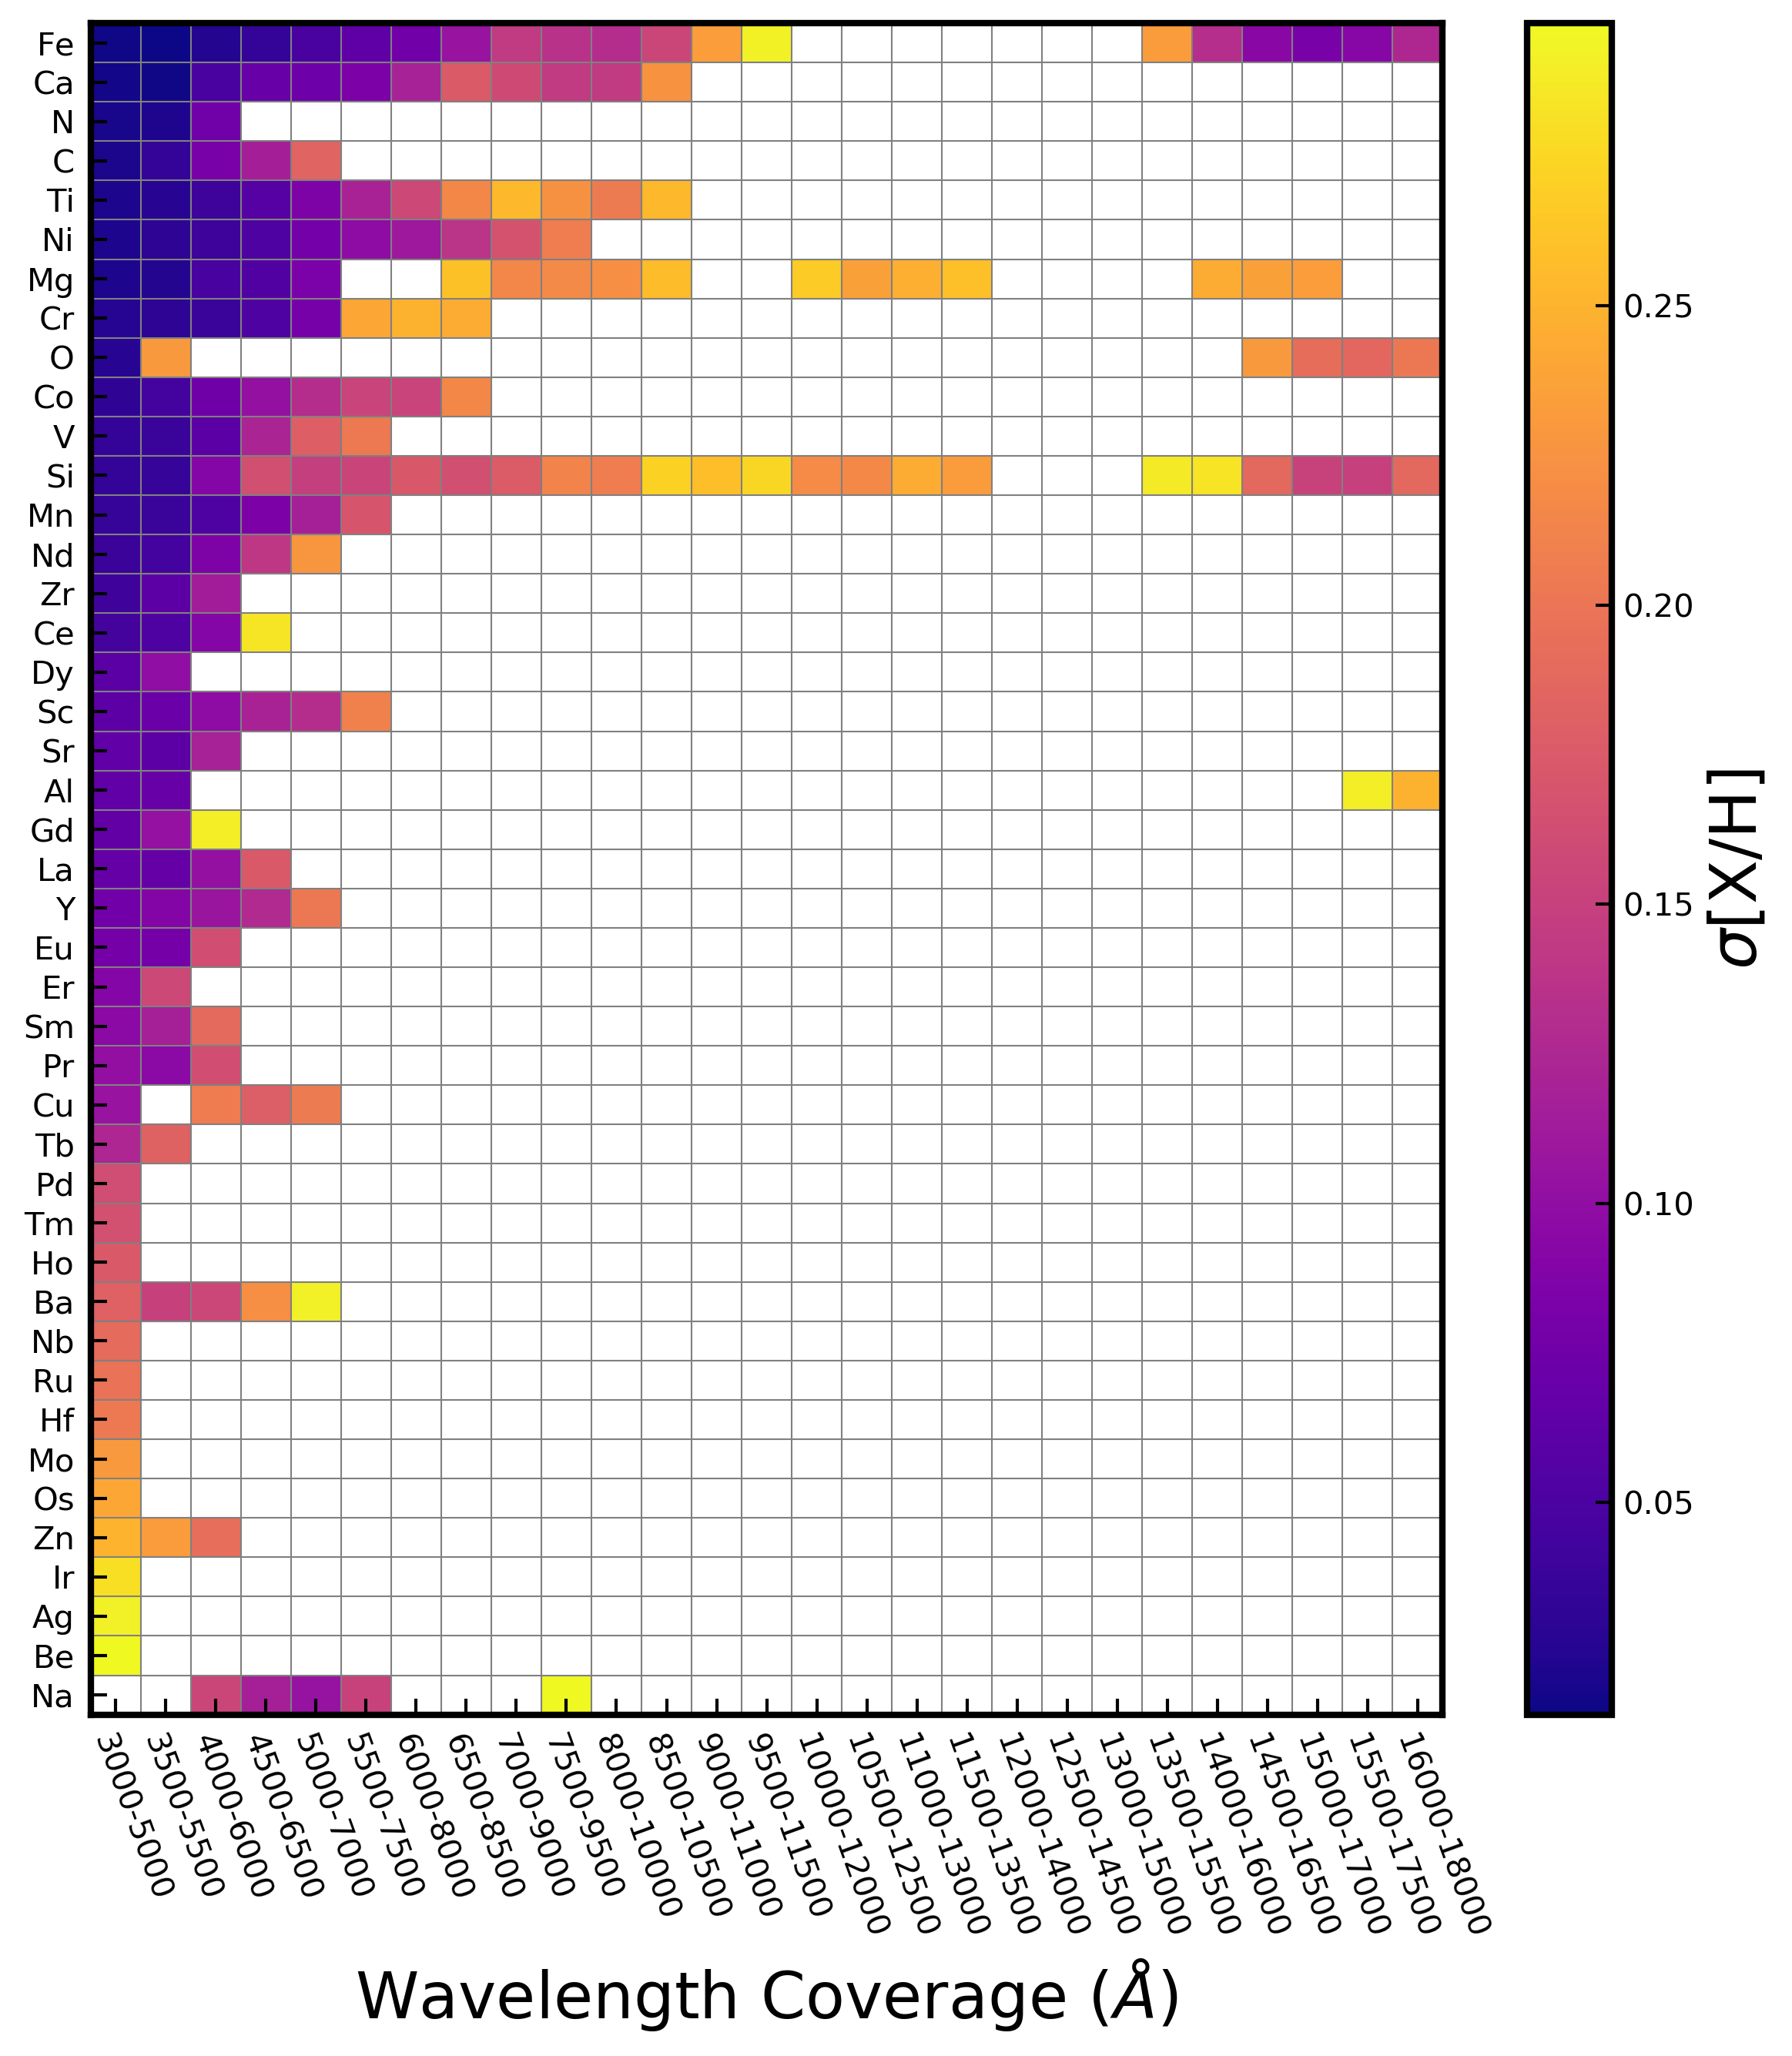

In [9]:
fig = gridplot_crlb(CRLB_R2000_Windows, r'Wavelength Coverage $\left(\AA\right)$')
fig.savefig(output_dir+'2000A_R2000_windows.png')
fig.show()

## Figures 17: CRLBs vs. 2000 \AA Window (R=5000)

In [10]:
window_width = 2000
window_step = 500
window_min = 3000
window_max = 18000.1
res = 5000
samp = 3

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5', res='max')

# Calculate SNR Assuming Uniform Throughput
RGB_unnorm = ref.ReferenceSpectra(reference='RGB_m1.5', res='max', normalized=False)
R5000 = inst.MiscInstrument('R5000', res=5000, samp=3, start=3000, end=18000)
RGB_unnorm.convolve(R5000)
idx = find_nearest_idx(RGB_unnorm.wavelength['R5000'], 6000)
factor = 1 / np.sqrt(RGB_unnorm.spectra['R5000'][0, idx])
snr = 100 * factor * np.sqrt(RGB_unnorm.spectra['R5000'][0])

# Initialize CRLB Data Frames
CRLB_R5000_Windows = pd.DataFrame(index=RGB.labels.index)

# Loop Through Windows
window_starts = np.arange(window_min, window_max-window_width, step=window_step)
window_ends = window_starts + window_width
for i in range(len(window_starts)):
    start = window_starts[i]
    end = window_ends[i]
    window = inst.MiscInstrument(f'{start:.0f}-{end:.0f}',
                                 res=res, samp=samp, start=start, end=end)
    window.set_snr(snr)
    RGB.convolve(window)
    RGB.calc_gradient(window.name, v_micro_scaling=1)
    CRLB_R5000_Windows[window.name] = calc_crlb(RGB, window)
    
# Sort CRLBs & Pretty Up Indices
CRLB_R5000_Windows = sort_crlb(CRLB_R5000_Windows, cutoff=0.3, sort_by='default')
CRLB_R5000_Windows = CRLB_R5000_Windows.iloc[3:]

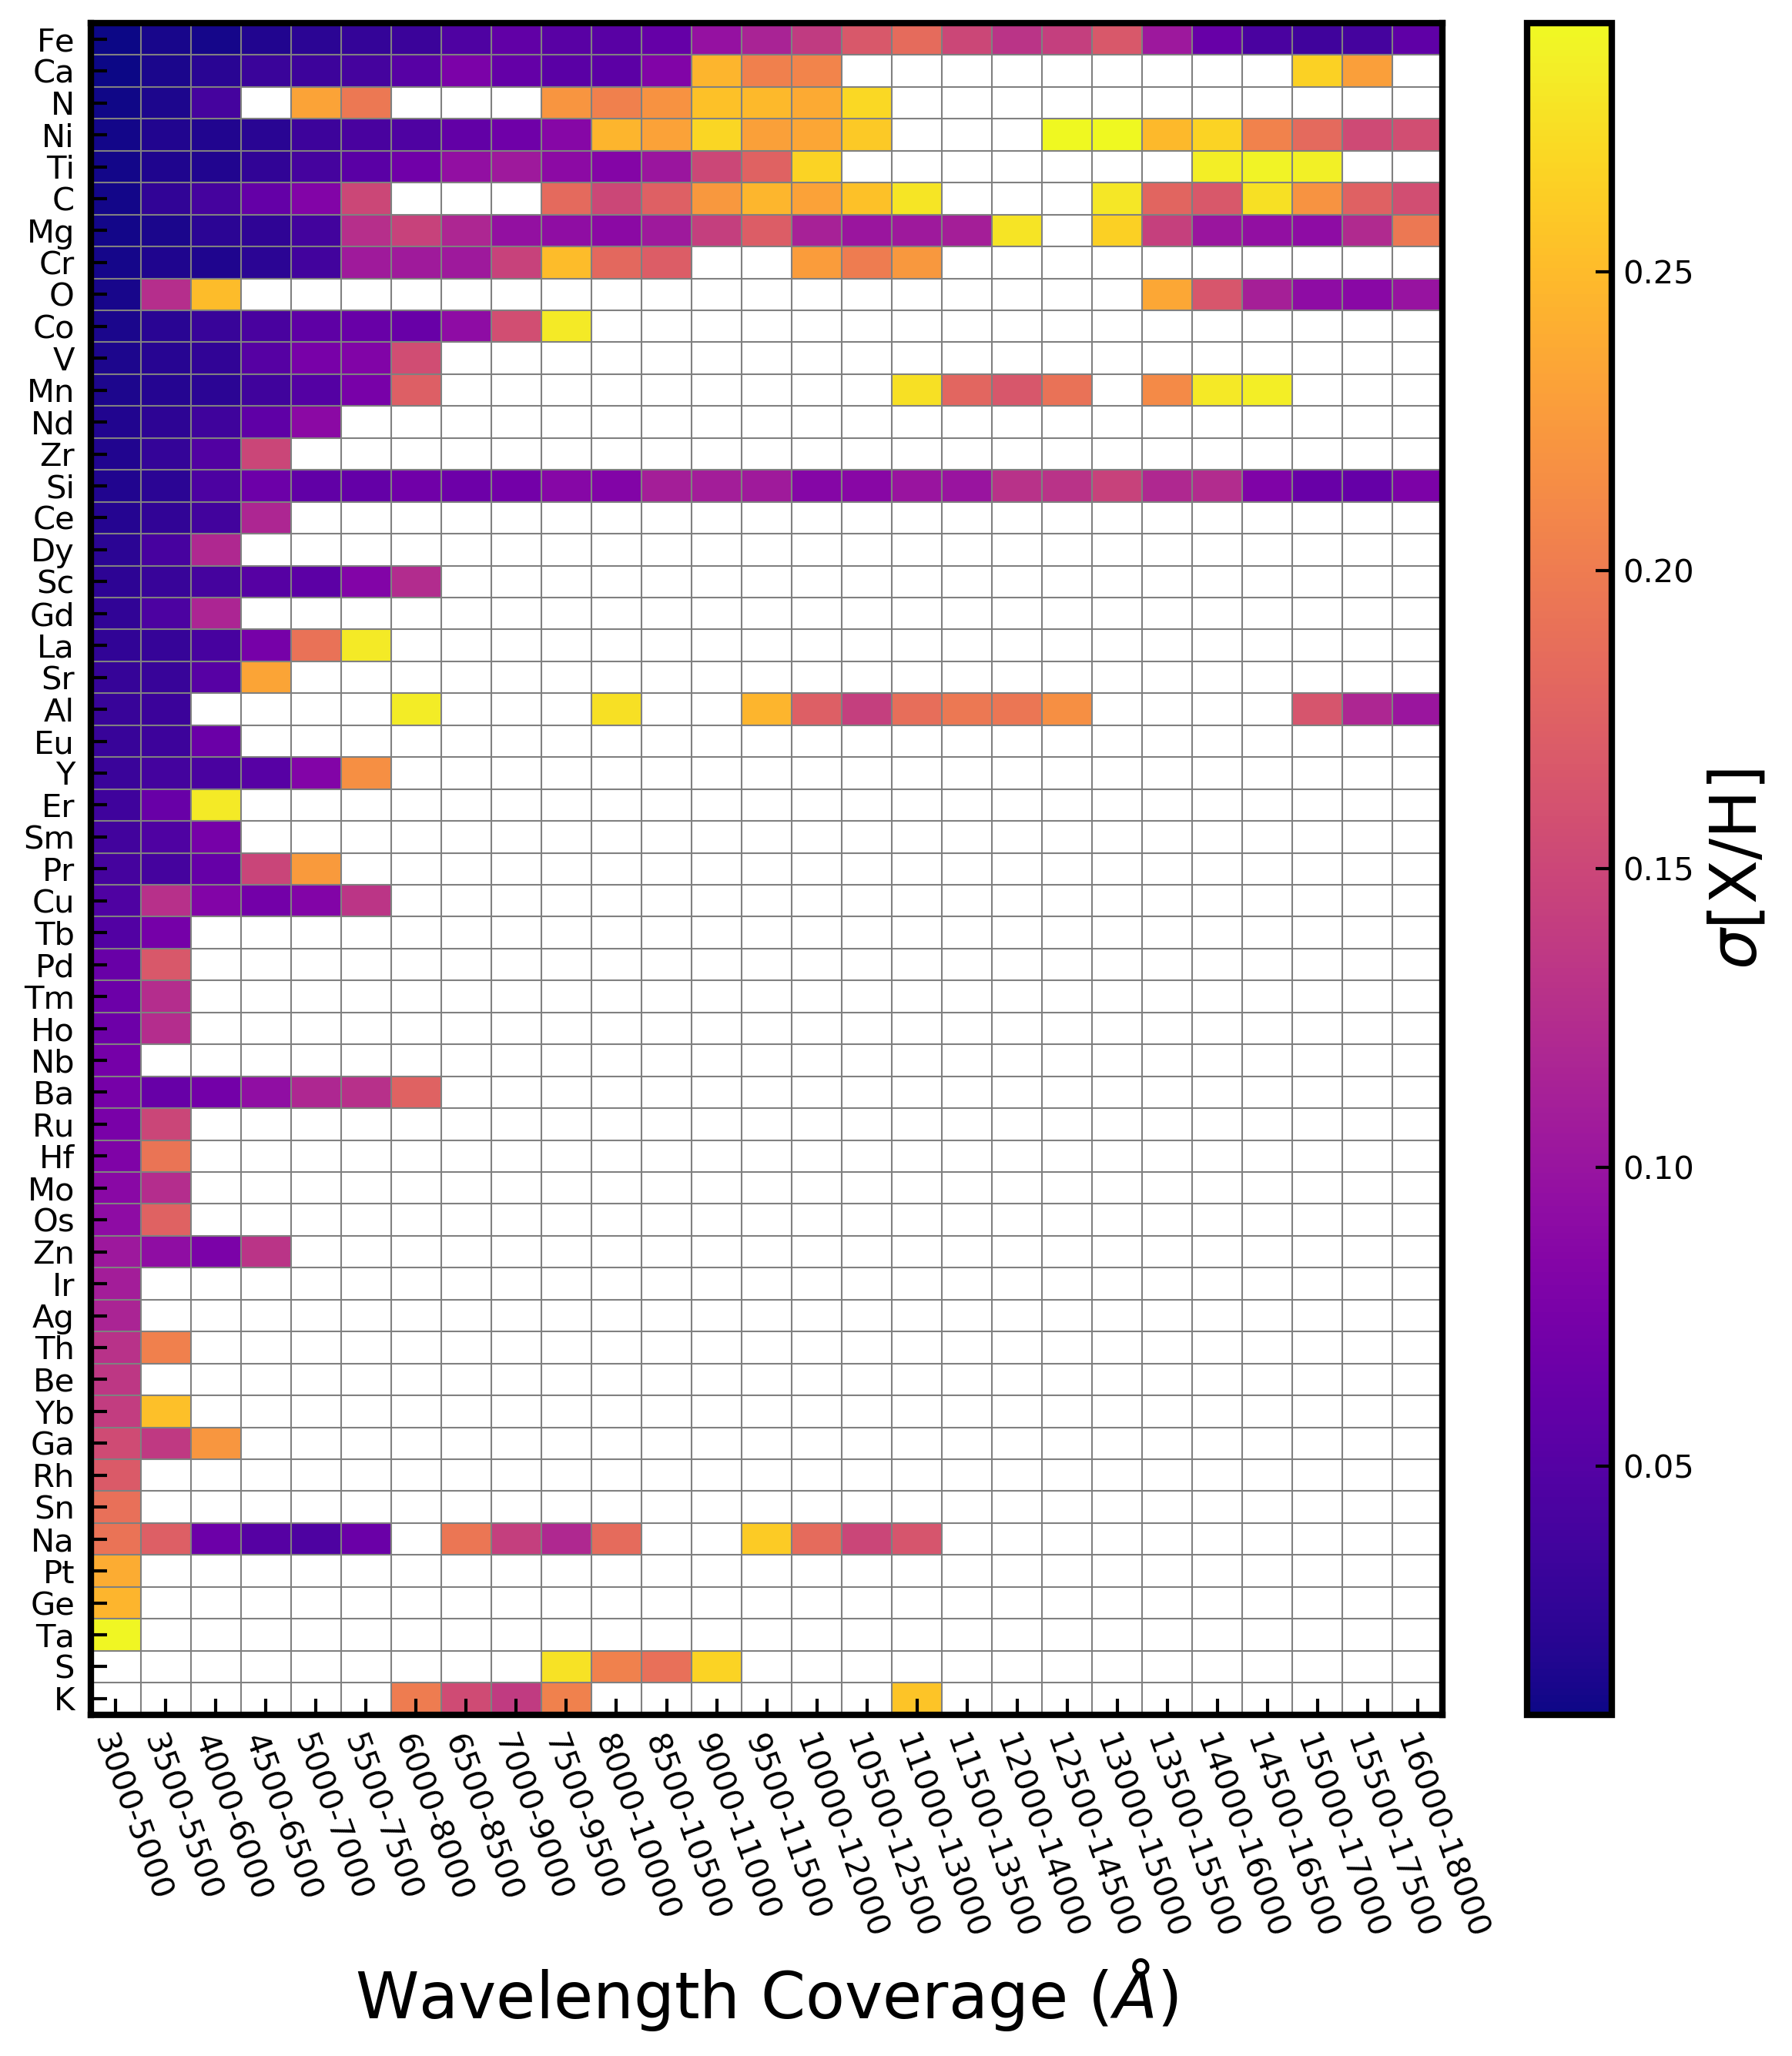

In [14]:
fig = gridplot_crlb(CRLB_R5000_Windows, r'Wavelength Coverage $\left(\AA\right)$')
fig.savefig(output_dir+'2000A_R5000_windows.png')
fig.show()

## Figure 18: Gradients of r-/s-process Elements

In [4]:
# Initialize Preset Instrument
allInst = inst.AllInstruments()
R2000 = inst.MiscInstrument('R2000', res=2000, samp=3, start=3000, end=18000)

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5', res='max')

# Convolve Reference Spectra to Insturment Resolution
RGB.convolve(R2000)

# Calculate Gradient Spectra
RGB.calc_gradient(R2000.name)

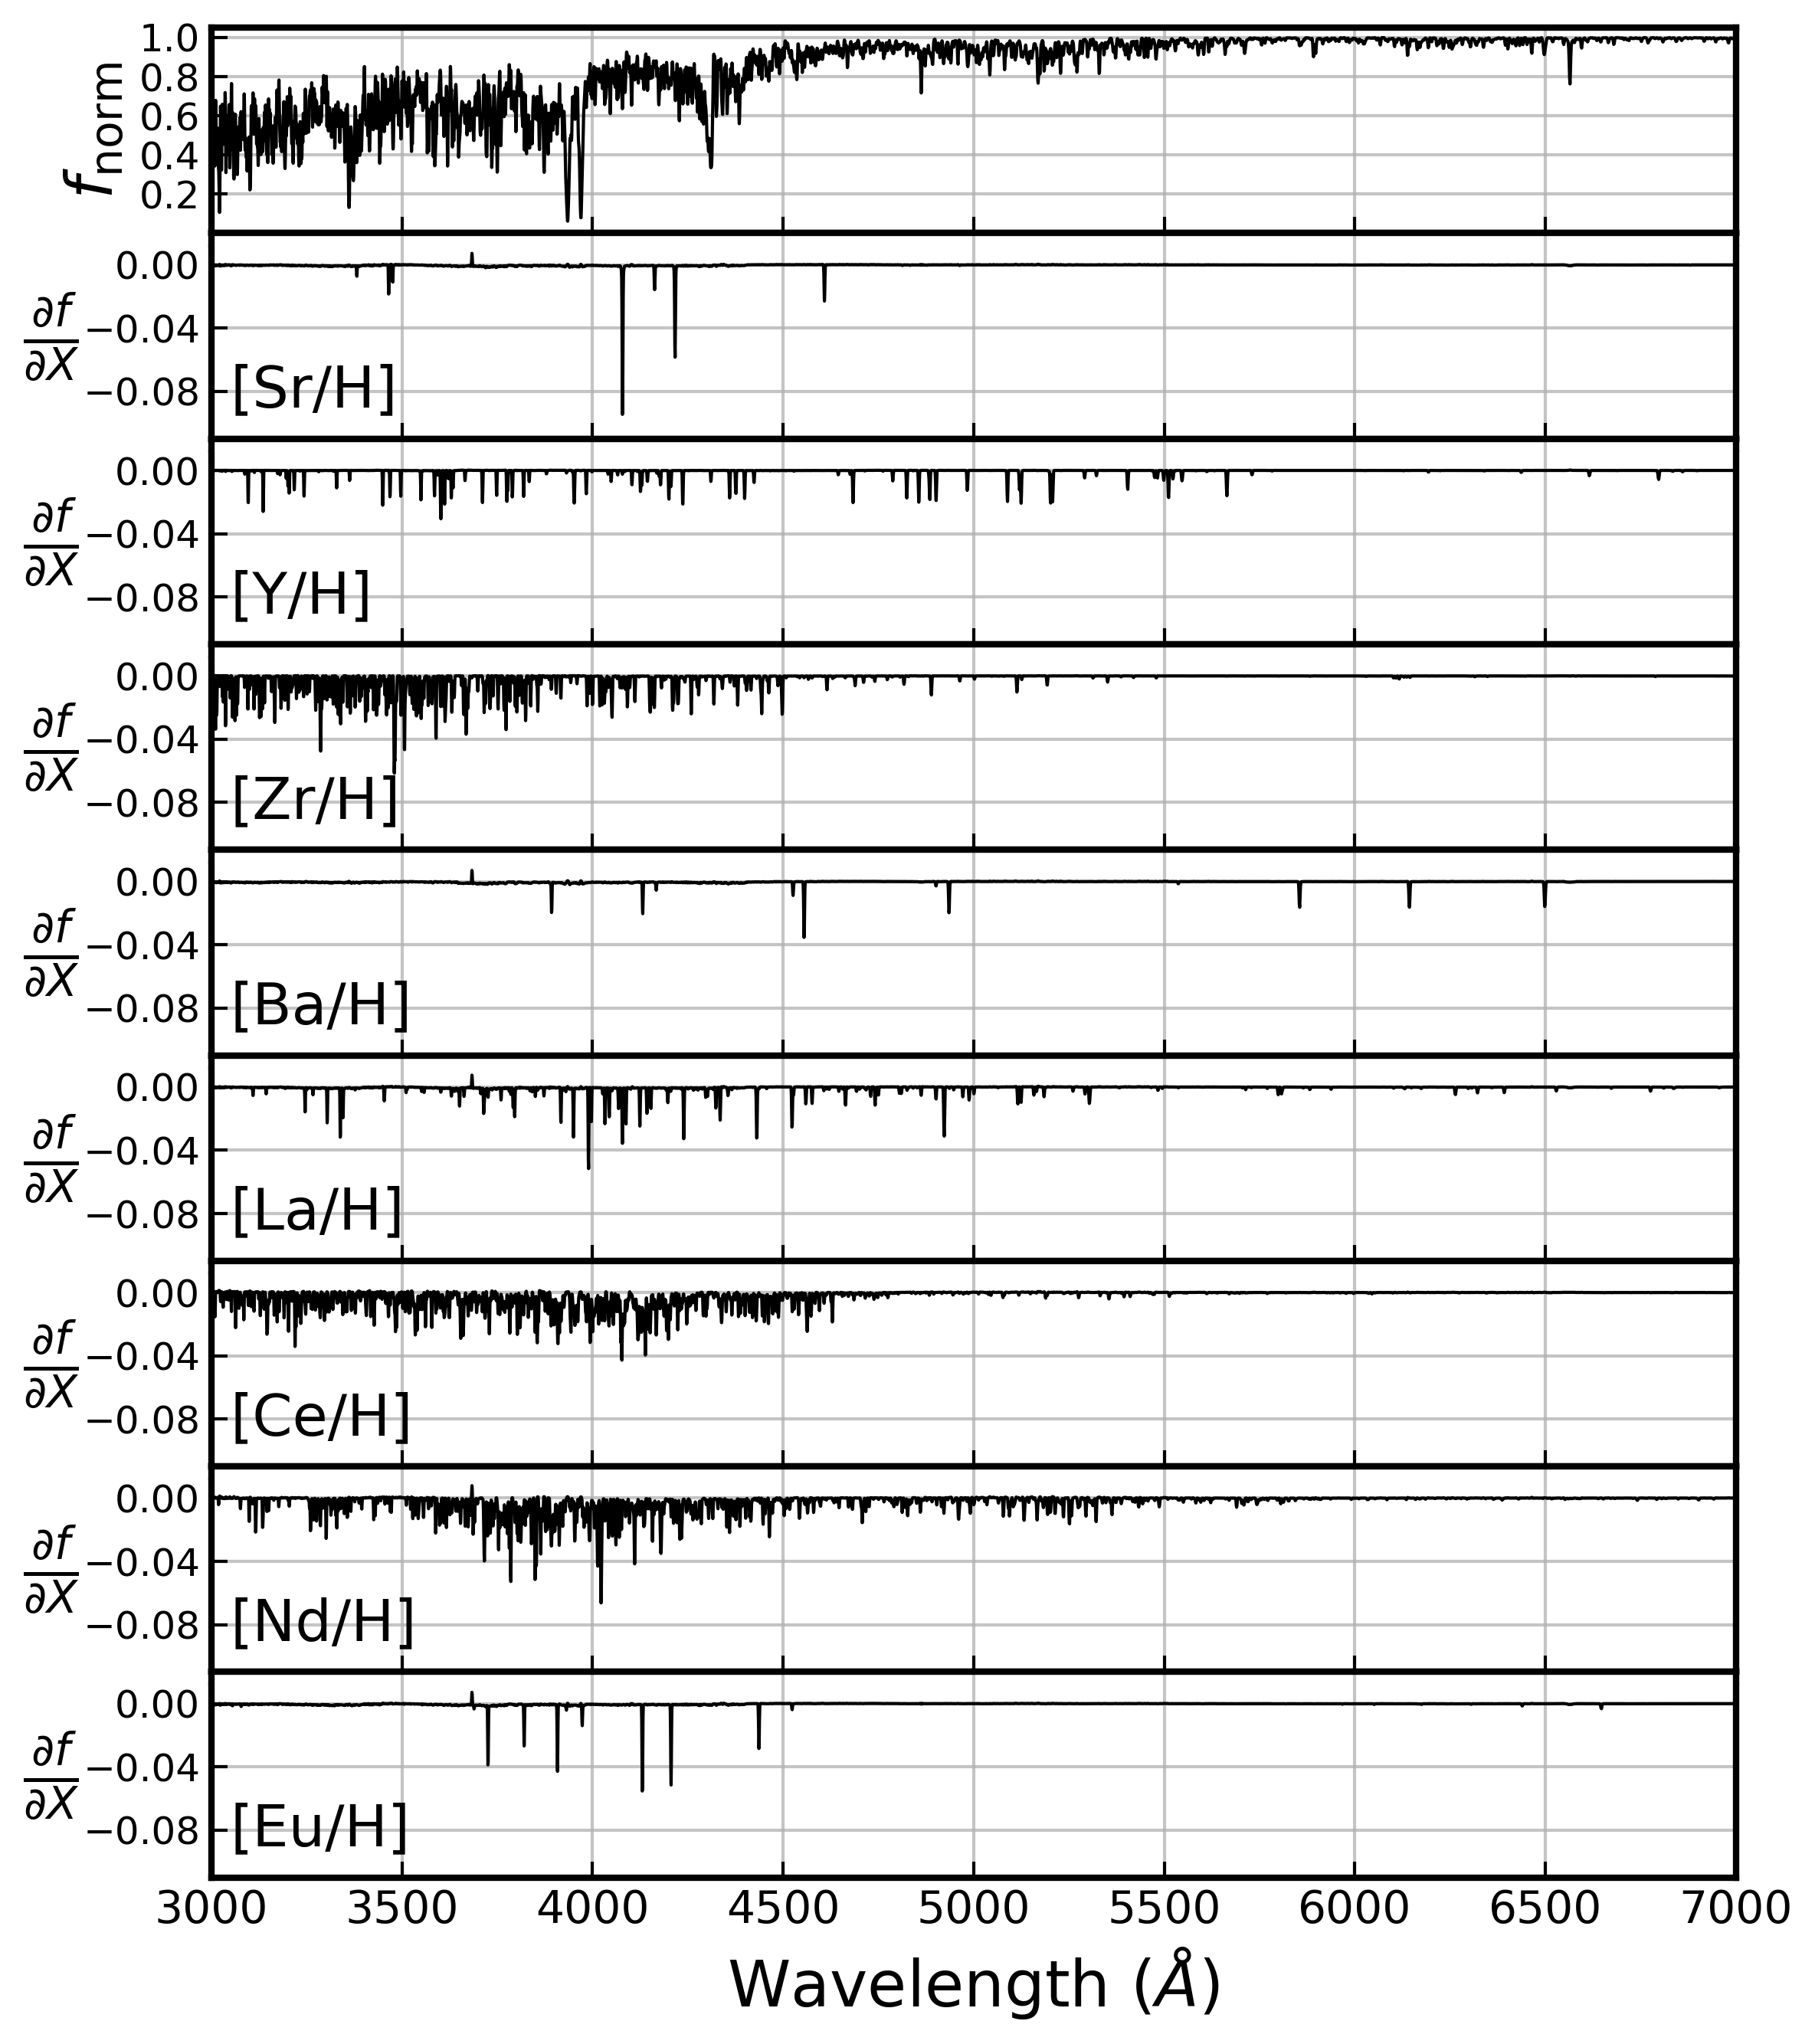

In [6]:
grad_labels = ['Sr', 'Y', 'Zr', 'Ba', 'La', 'Ce', 'Nd', 'Eu']
fig = plot_gradients(RGB, 'R2000', grad_labels,
                     panel_height=1, inset_ylabel=True,
                     inset_ylabel_xoffset=50, inset_ylabel_yoffset=0.02,
                     xlim=(3000,7000), ylim=(-0.11, 0.02), ylim_spec=(0.0, 1.05),
                     yticks=[-0.08,-0.04,0.0], yticks_spec=[0.2,0.4,0.6,0.8,1.0],
                     ytick_size=12, xtick_size=14,
                     ylabel_size=20, xlabel_size=20,
                     include_spec=True,)
fig.savefig(output_dir+'rs_gradients.png')
fig.show()

## Figure 19: CRLBs Beyond 1 Mpc

In [99]:
# Initialize Preset Instrument
allInst = inst.AllInstruments()
G140H_F100LP = allInst.spectrographs['NIRSpec G140H/F100LP']
gmacs_g3b = inst.MiscInstrument('GMACS (G3b)', res=2500, samp=3, start=3700, end=5500)
gmacs_g3r = inst.MiscInstrument('GMACS (G3r)', res=2500, samp=3, start=6100, end=8900)


# Initialize Reference Spectra
TRGB = ref.ReferenceSpectra(reference='TRGB_m1.5b', alpha_included=True)

# Convolve Reference Spectra to Instrument Resolution
TRGB.convolve(G140H_F100LP)
TRGB.convolve(gmacs_g3b)
TRGB.convolve(gmacs_g3r)

# Calculate Gradient Spectra
TRGB.calc_gradient(G140H_F100LP.name)
TRGB.calc_gradient(gmacs_g3b.name)
TRGB.calc_gradient(gmacs_g3r.name)

# Load S/N for All Instruments & magnitudes
v_array = np.linspace(21, 26, 11)
snr_G140H_F100LP = {}
snr_gmacs = {}
for v in v_array:
    hdul_h100 = fits.open(f'./etc_files/jwst_h100_v{v:2.1f}_trgb.fits')
    snr_G140H_F100LP[v] = np.array([hdul_h100[1].data['WAVELENGTH']*1e4, hdul_h100[1].data['SN']])
    snr_G140H_F100LP[v][1][np.isinf(snr_G140H_F100LP[v][1])] = 0

    tmp = pd.read_csv(f'./etc_files/gmacs_6h_V{v:2.1f}.csv', skiprows=1, dtype=float)
    tmp_red = tmp[['X', 'Y']].sort_values(axis=0, by='X').values.T
    tmp_blue = tmp[['X.1', 'Y.1']].sort_values(axis=0, by='X.1').values.T
    R_red = tmp_red[0] / 1.4
    R_blue = tmp_blue[0] / 1.4
    tmp_red[1] *= (2500/R_red)**(-1/2)
    tmp_blue[1] *= (2500/R_blue)**(-1/2)
    r_start = np.nanargmin(np.abs(tmp_red[0] - 5550))
    b_end = np.nanargmin(np.abs(tmp_blue[0] - 5550))
    snr_gmacs[v] = np.concatenate([tmp_blue[:, :b_end], tmp_red[:, r_start:]], axis=1)

# Define Prior
priors = {'Teff': 100, 'logg': 0.15, 'v_micro': 0.25}

# Initialize CRLB Data Frames
CRLB_h100 = pd.DataFrame(index=TRGB.labels.index)
CRLB_h100_p = pd.DataFrame(index=TRGB.labels.index)
CRLB_gmt = pd.DataFrame(index=TRGB.labels.index)
CRLB_gmt_p = pd.DataFrame(index=TRGB.labels.index)

# Set S/N and Calculate CRLBs
snr_h100 = {}
snr_gmacs_b = {}
snr_gmacs_r = {}
for v in v_array:
    # JWST
    G140H_F100LP.set_snr(snr_G140H_F100LP[v])
    snr_h100[v] = G140H_F100LP.snr
    CRLB_h100[v] = calc_crlb(TRGB, G140H_F100LP, use_alpha=True)
    CRLB_h100_p[v] = calc_crlb(TRGB, G140H_F100LP, priors=priors, use_alpha=True)
    # GMACS
    gmacs_g3b.set_snr(snr_gmacs[v])
    gmacs_g3r.set_snr(snr_gmacs[v])
    snr_gmacs_b[v] = gmacs_g3b.snr  # Save for plotting
    snr_gmacs_r[v] = gmacs_g3r.snr  # Save for plotting
    CRLB_gmt[v] = calc_crlb(TRGB, [gmacs_g3b, gmacs_g3r], use_alpha=True)
    CRLB_gmt_p[v] = calc_crlb(TRGB, [gmacs_g3b, gmacs_g3r], priors=priors, use_alpha=True)

# Sort CRLBs & Pretty Up Indices
CRLB_h100 = sort_crlb(CRLB_h100, cutoff=1.0, sort_by='default')
CRLB_h100_p = sort_crlb(CRLB_h100_p, cutoff=1.0, sort_by='default')
CRLB_gmt = sort_crlb(CRLB_gmt, cutoff=1.0, sort_by='default')
CRLB_gmt_p = sort_crlb(CRLB_gmt_p, cutoff=1.0, sort_by='default')

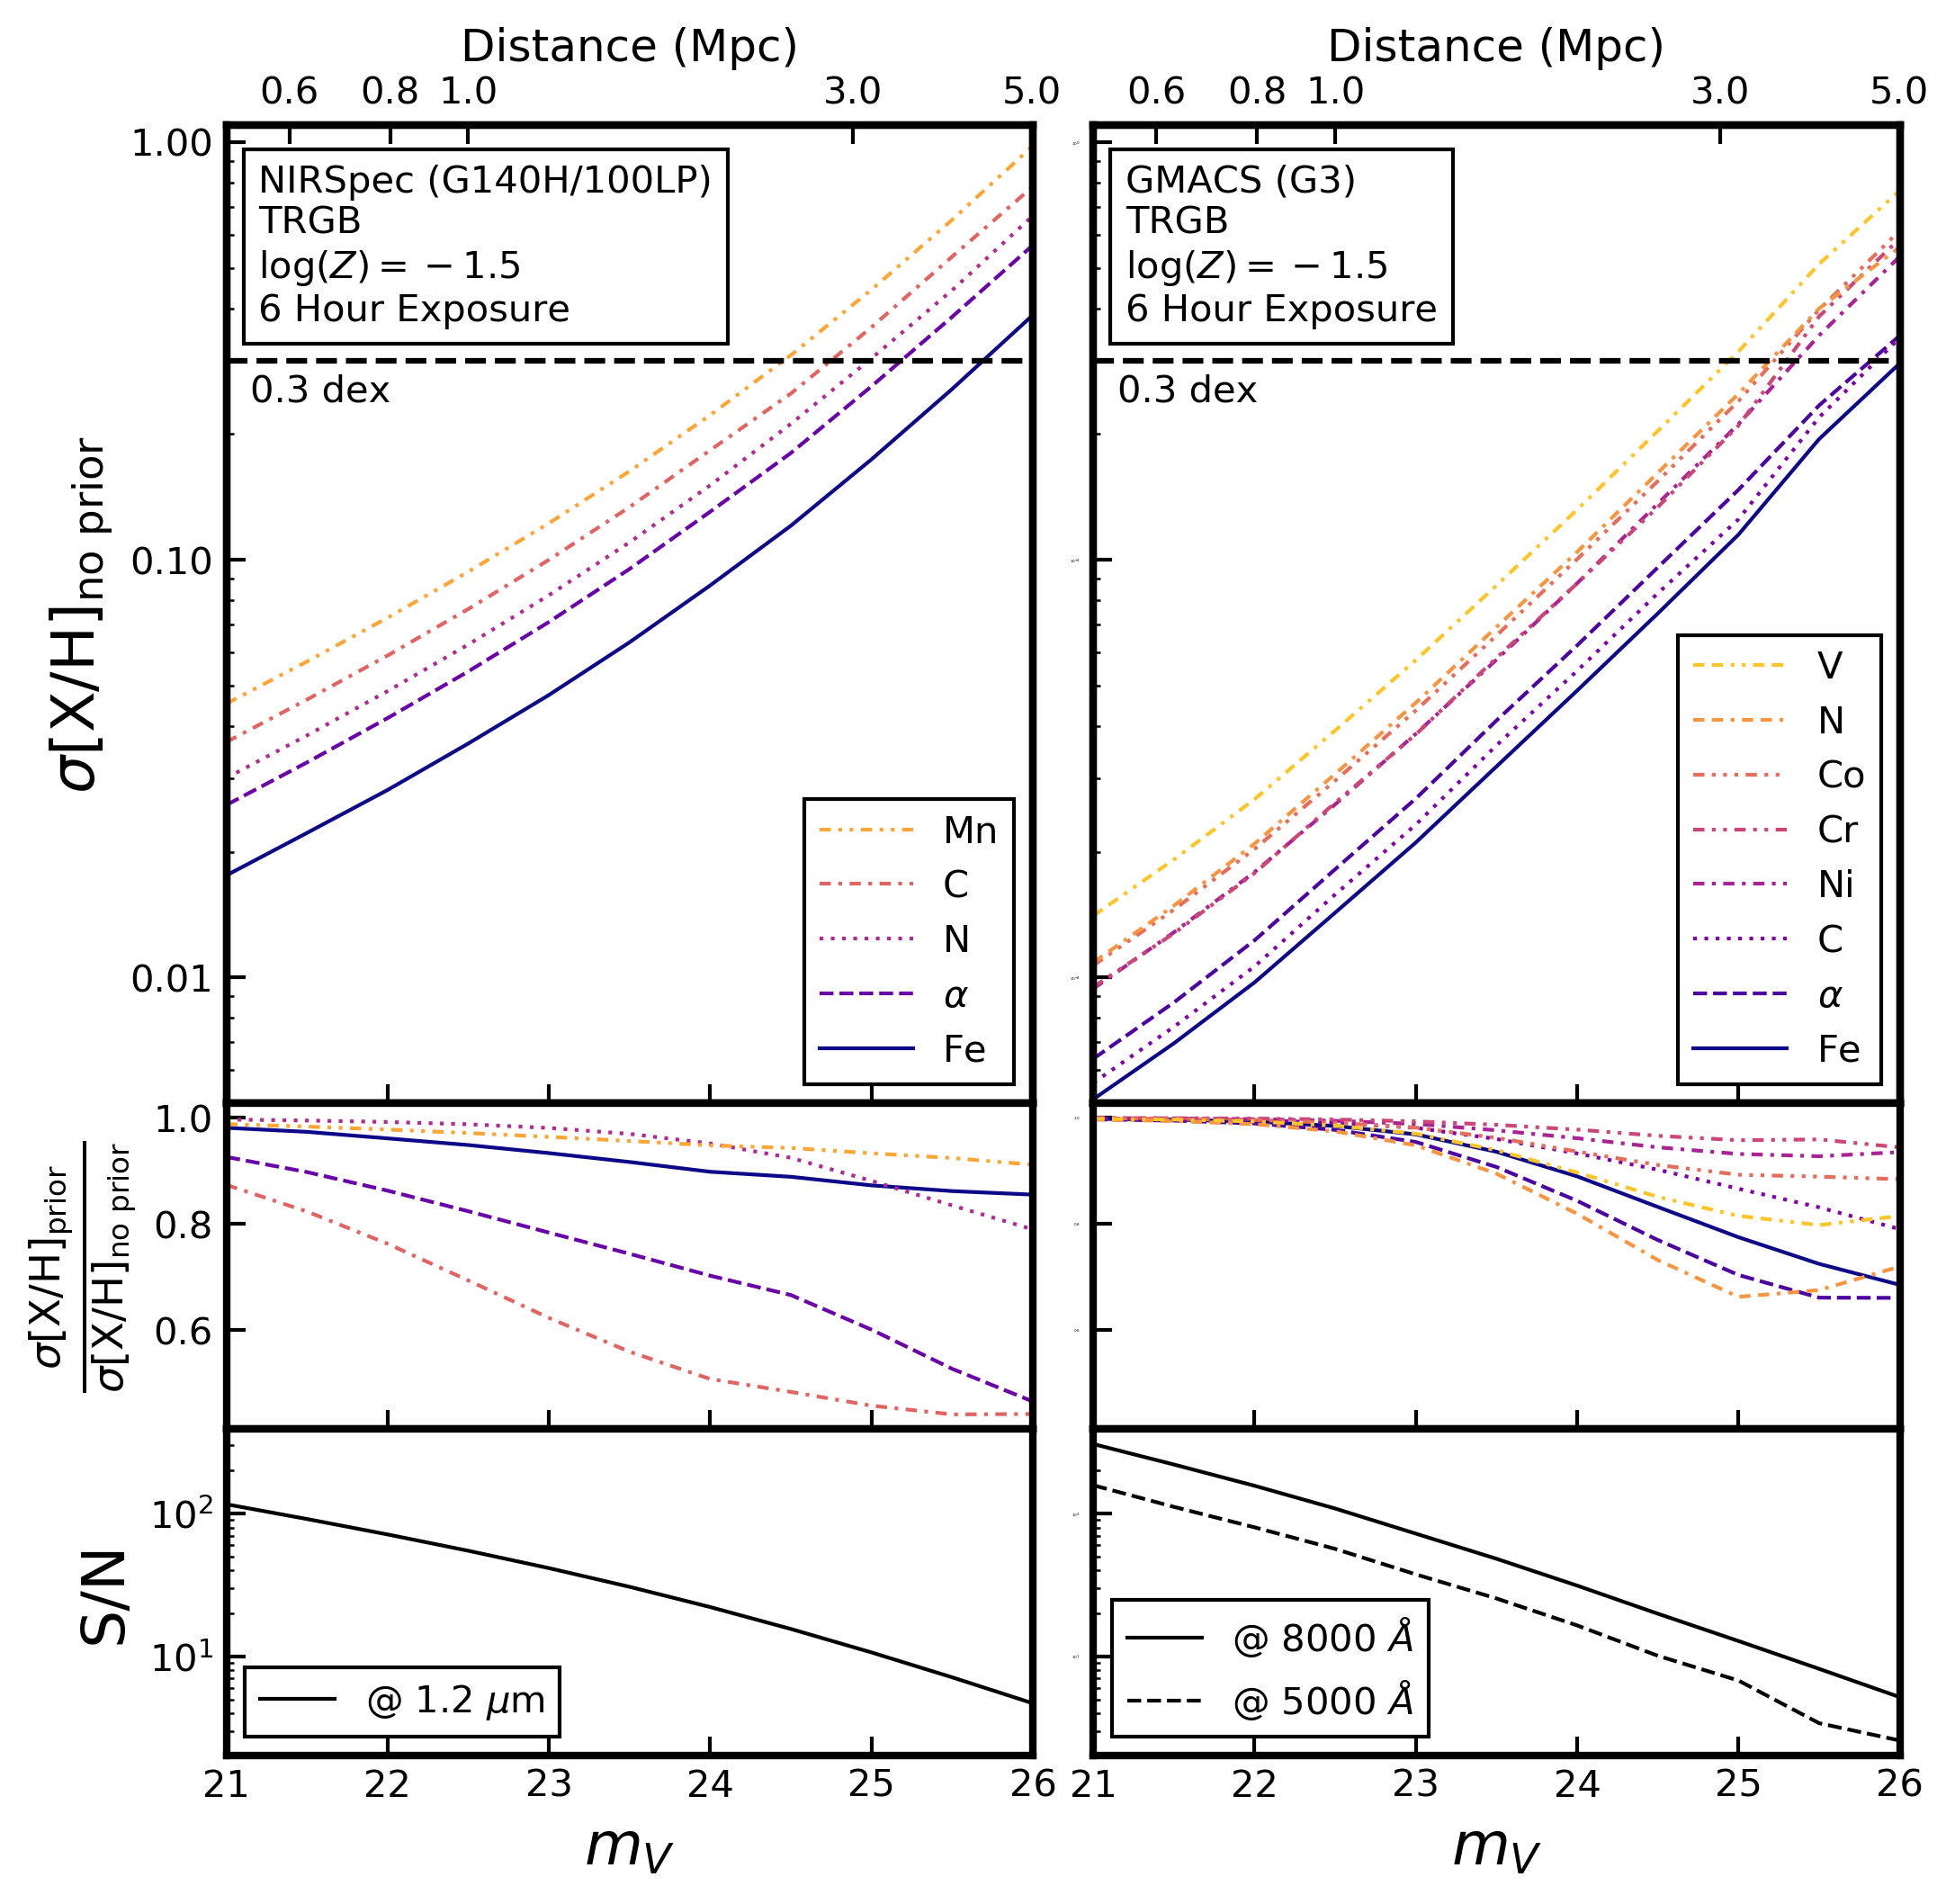

In [100]:
c1 = plt.cm.get_cmap('plasma', 6)
c2 = plt.cm.get_cmap('plasma', 9)

# Initialize Figure
fig = plt.figure(figsize=(8,8))
gs = GridSpec(3, 2, height_ratios=(3,1,1))
gs.update(hspace=0.0, wspace=0.075)
ax1a = plt.subplot(gs[0, 0])
ax1b = ax1a.twiny()
ax2a = plt.subplot(gs[0, 1])
ax2b = ax2a.twiny()
ax3 = plt.subplot(gs[1, 0], sharex=ax1a)
ax4 = plt.subplot(gs[1, 1], sharex=ax2a, sharey=ax3)
ax5 = plt.subplot(gs[2, 0], sharex=ax1a)
ax6 = plt.subplot(gs[2, 1], sharex=ax2a, sharey=ax5)
# JWST CRLBs
ax1a.plot(CRLB_h100.columns, CRLB_h100.loc['Fe'],    c=c1(0), lw=1, ls='-')
ax1a.plot(CRLB_h100.columns, CRLB_h100.loc['alpha'], c=c1(1), lw=1, ls='--', label=r'$\alpha$')
ax1a.plot(CRLB_h100.columns, CRLB_h100.loc['N'],     c=c1(2), lw=1, ls=(0, (1, 2, 1, 2)))
ax1a.plot(CRLB_h100.columns, CRLB_h100.loc['C'],     c=c1(3), lw=1, ls=(0, (3, 2, 1, 2)))
ax1a.plot(CRLB_h100.columns, CRLB_h100.loc['Mn'],    c=c1(4), lw=1, ls=(0, (3, 2, 1, 2, 1, 2)))
# GMACS CRLBs
ax2a.plot(CRLB_gmt.columns, CRLB_gmt.loc['Fe'],    c=c2(0), lw=1, ls='-')
ax2a.plot(CRLB_gmt.columns, CRLB_gmt.loc['alpha'], c=c2(1), lw=1, ls='--', label=r'$\alpha$')
ax2a.plot(CRLB_gmt.columns, CRLB_gmt.loc['C'],     c=c2(2), lw=1, ls=(0, (1, 2, 1, 2)))
ax2a.plot(CRLB_gmt.columns, CRLB_gmt.loc['Ni'],    c=c2(3), lw=1, ls=(0, (3, 2, 1, 2)))
ax2a.plot(CRLB_gmt.columns, CRLB_gmt.loc['Cr'],    c=c2(4), lw=1, ls=(0, (3, 2, 1, 2, 1, 2)))
ax2a.plot(CRLB_gmt.columns, CRLB_gmt.loc['Co'],    c=c2(5), lw=1, ls=(0, (3, 2, 1, 2, 1, 2, 1, 2)))
ax2a.plot(CRLB_gmt.columns, CRLB_gmt.loc['N'],     c=c2(6), lw=1, ls=(0, (3, 2, 3, 2, 1, 2)))
ax2a.plot(CRLB_gmt.columns, CRLB_gmt.loc['V'],     c=c2(7), lw=1, ls=(0, (3, 2, 3, 2, 1, 2, 1, 2)))
# JWST Prior Improvements
ax3.plot(CRLB_h100.columns, CRLB_h100_p.loc['Fe']/CRLB_h100.loc['Fe'], c=c1(0), lw=1, ls='-')
ax3.plot(CRLB_h100.columns, CRLB_h100_p.loc['alpha']/CRLB_h100.loc['alpha'], c=c1(1), lw=1, ls='--', label=r'$\alpha$')
ax3.plot(CRLB_h100.columns, CRLB_h100_p.loc['N']/CRLB_h100.loc['N'], c=c1(2), lw=1, ls=(0, (1, 2, 1, 2)))
ax3.plot(CRLB_h100.columns, CRLB_h100_p.loc['C']/CRLB_h100.loc['C'], c=c1(3), lw=1, ls=(0, (3, 2, 1, 2)))
ax3.plot(CRLB_h100.columns, CRLB_h100_p.loc['Mn']/CRLB_h100.loc['Mn'], c=c1(4), lw=1, ls=(0, (3, 2, 1, 2, 1, 2)))
# GMACS Prior Improvements
ax4.plot(CRLB_gmt.columns, CRLB_gmt_p.loc['Fe']/CRLB_gmt.loc['Fe'], c=c2(0), lw=1, ls='-')
ax4.plot(CRLB_gmt.columns, CRLB_gmt_p.loc['alpha']/CRLB_gmt.loc['alpha'], c=c2(1), lw=1, ls='--', label=r'$\alpha$')
ax4.plot(CRLB_gmt.columns, CRLB_gmt_p.loc['C']/CRLB_gmt.loc['C'], c=c2(2), lw=1,   ls=(0, (1, 2, 1, 2)))
ax4.plot(CRLB_gmt.columns, CRLB_gmt_p.loc['Ni']/CRLB_gmt.loc['Ni'], c=c2(3), lw=1, ls=(0, (3, 2, 1, 2)))
ax4.plot(CRLB_gmt.columns, CRLB_gmt_p.loc['Cr']/CRLB_gmt.loc['Cr'], c=c2(4), lw=1, ls=(0, (3, 2, 1, 2, 1, 2)))
ax4.plot(CRLB_gmt.columns, CRLB_gmt_p.loc['Co']/CRLB_gmt.loc['Co'], c=c2(5), lw=1, ls=(0, (3, 2, 1, 2, 1, 2, 1, 2)))
ax4.plot(CRLB_gmt.columns, CRLB_gmt_p.loc['N']/CRLB_gmt.loc['N'], c=c2(6), lw=1,   ls=(0, (3, 2, 3, 2, 1, 2)))
ax4.plot(CRLB_gmt.columns, CRLB_gmt_p.loc['V']/CRLB_gmt.loc['V'], c=c2(7), lw=1,   ls=(0, (3, 2, 3, 2, 1, 2, 1, 2)))
# JWST S/N
jwst_snr_idx = find_nearest_idx(G140H_F100LP.wave, 12000)
ax5.plot(v_array, [snr_h100[v][jwst_snr_idx] for v in v_array], c='k', lw=1, label=r'@ 1.2 $\mu$m')
# GMACS S/N
gmacsr_snr_idx = find_nearest_idx(gmacs_g3r.wave, 8000)
ax6.plot(v_array, [snr_gmacs_r[v][gmacsr_snr_idx] for v in v_array], c='k', lw=1, ls='-' , label=r'@ 8000 $\AA$')
gmacsb_snr_idx0 = find_nearest_idx(gmacs_g3b.wave, 4999)
gmacsb_snr_idx1 = find_nearest_idx(gmacs_g3b.wave, 5001)
ax6.plot(v_array, [np.mean(snr_gmacs_b[v][gmacsb_snr_idx0:gmacsb_snr_idx1]) for v in v_array],
         c='k', lw=1, ls='--', label=r'@ 5000 $\AA$')
# Annotations
ax1a.axhline(0.3, c='k', ls='--')
ax2a.axhline(0.3, c='k', ls='--')
ax1a.text(21.15, 0.24, '0.3 dex', size=10)
ax1a.text(0.04, 0.96, s='NIRSpec (G140H/100LP)\nTRGB\n$\log(Z)=-1.5$\n6 Hour Exposure',
         fontsize=10,
         horizontalalignment='left',
         verticalalignment='top',
         transform=ax1a.transAxes,
         bbox=dict(facecolor='white', edgecolor='black', pad=4.0))
ax2a.text(21.15, 0.24, '0.3 dex', size=10)
ax2a.text(0.04, 0.96, s='GMACS (G3)\nTRGB\n$\log(Z)=-1.5$\n6 Hour Exposure',
         fontsize=10,
         horizontalalignment='left',
         verticalalignment='top',
         transform=ax2a.transAxes,
         bbox=dict(facecolor='white', edgecolor='black', pad=4.0))
# Axes Labels
ax1a.set_ylabel(r'$\sigma$[X/H]$_{\mathrm{no\ prior}}$', size=16)
ax1b.set_xlabel('Distance (Mpc)', size=12)
ax2b.set_xlabel('Distance (Mpc)', size=12)
ax3.set_ylabel(r'$\frac{\sigma\mathrm{[X/H]}_{\mathrm{prior}}}{\sigma\mathrm{[X/H]}_{\mathrm{no\ prior}}}$', size=16)
ax5.set_ylabel('S/N', size=16)
ax5.set_xlabel(r'$m_V$', size=16)
ax6.set_xlabel(r'$m_V$', size=16)
# Axes Limits
ax1a.set_xlim(21,26)
ax1a.set_ylim(0.005,1.1)
ax2a.set_xlim(21,26)
ax2a.set_ylim(0.005,1.1)
# Axes Scales
ax1a.set_yscale('log')
ax2a.set_yscale('log')
ax5.set_yscale('log')
ax6.set_yscale('log')
# Axes Tick Size
ax1a.tick_params(axis='x', which='major', labelsize=0)
ax2a.tick_params(axis='both', which='major', labelsize=0)
ax3.tick_params(axis='x', which='major', labelsize=0)
ax4.tick_params(axis='both', which='major', labelsize=0)
ax6.tick_params(axis='y', which='major', labelsize=0)
# Axes Tick Formatting
ax1a.yaxis.set_major_formatter(StrMethodFormatter("{x:.2f}"))
d_steps = np.array([600, 800, 1e3, 3e3, 5e3])
ax1b.set_xlim(ax1a.get_xlim())
ax2b.set_xlim(ax2a.get_xlim())
ax1b.set_xticks(kpc_to_mu(d_steps) - 2.5)
ax2b.set_xticks(kpc_to_mu(d_steps) - 2.5)
tick_labels = [f'{d/1e3:.1f}' for d in d_steps]
ax1b.set_xticklabels(tick_labels, size=10, rotation=0, ha='center')
ax2b.set_xticklabels(tick_labels, size=10, rotation=0, ha='center')
# Remove Grids
for ax in fig.axes:
    ax.grid(False, 'both', 'both')
# Legends
ax1a.legend()
handles, labels = ax1a.get_legend_handles_labels()
ax1a.legend(handles[::-1], labels[::-1], fontsize=10,
            loc='lower right', edgecolor='k', handlelength=2.5)
handles, labels = ax2a.get_legend_handles_labels()
ax2a.legend()
ax2a.legend(handles[::-1], labels[::-1], fontsize=10,
            loc='lower right', edgecolor='k', handlelength=2.5)
ax5.legend(fontsize=10, edgecolor='k', loc='lower left')
ax6.legend(fontsize=10, edgecolor='k', loc='lower left')

fig.savefig(output_dir+'jwst_gmacs_limit_p.png')
plt.show()